In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png")

<h2><center>
# Influencers in Social Networks
 <img src="https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2017/06/social-media-influencer.jpg" >
</center></h2> <h4><center>
# Machine Learning Project
</center></h4>
Developed by [Jesus Solano](http://www.jesussolano.com/) -- [Sergio Castelblanco](http://www.jesussolano.com/) -- [Jose Sandoval](http://www.jesussolano.com/) -- [Aleksey Sepulveda](http://www.jesussolano.com/)


version 7.3, June 24 2018

<h1> <center> Problem Description </h1> </center> 

This competition, sponsored by Data Science London and the Windows Azure Users Group of England, in partnership with Microsoft and Peerindex, aims to train an automatic learning model that predicts with high precision the human judgment as to who is most influential in Twitter

The data set, provided by Peerindex, comprises a series of variables that measure the activity in this social network for individuals by pairs identified as subject A and subject B. In this sense, the explanatory variables correspond to measures by pairs (A and B ) being these 11 numerical functions precalculated and not negative, based on the activity of Twitter. Within the
Explanatory variables are counted, among others: 

`follower_count`, `following_count`, `retweets_received`, `retweets_sent`, `mentions_received`, `mentions_sent`.

The variable explained, has the binary label that represents a human judgment on which of the two individuals, A or B, is more influential. A label '1' means that A is more influential than B. 0 means that B is more influential than A.

Taking into account these characteristics, there is a classification problem that will be faced through machine learning models ranging from KNN and logistic regression, to models of assembly and Stacking, through classification trees, Support Vector Machine, among others.
At the end we obtain a battery of models with a great performance, measured through the area under the AUC curve, among other metrics.

## Importing Data

In [17]:
import pandas as pd
data = pd.read_csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/train.csv",sep=",")
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


<h1> <center> Exploratory Analysis </h1> </center> 

We develop a preliminar analysis in order to indentify: 
* Univariable analysis.
* Multicoliniarity.
* Variable correlations.
* Balance Data Analysis.
* Probability density plots.
* Outliers.

In [18]:
# Import the neccesary libraries and set a seed. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image

np.random.seed(22)

### Describing dataset

In [19]:
print ("-----------------------------------") 
print ("Data shape :",data.shape,"\n")
print ("-----------------------------------")
print ("-----------------------------------")
print ("data info  :",data.info())
print ("-----------------------------------")

-----------------------------------
Data shape : (5500, 23) 

-----------------------------------
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions

In [20]:
# Statistical description of each variable. 

round(data.describe())

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,...,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0,5500.0
mean,1.0,649884.0,12659.0,5952.0,2666.0,1032.0,6.0,1.0,9.0,5268.0,...,12738.0,5903.0,2555.0,997.0,6.0,1.0,10.0,5255.0,85.0,3745.0
std,0.0,2028787.0,49009.0,17339.0,29165.0,10955.0,10.0,2.0,18.0,28947.0,...,50055.0,16298.0,25089.0,9342.0,10.0,2.0,19.0,26779.0,107.0,5518.0
min,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,2664.0,322.0,85.0,3.0,1.0,0.0,0.0,1.0,12.0,...,322.0,75.0,3.0,1.0,0.0,0.0,1.0,11.0,15.0,1206.0
50%,1.0,45589.0,778.0,932.0,49.0,14.0,2.0,0.0,4.0,195.0,...,773.0,890.0,49.0,14.0,2.0,0.0,3.0,190.0,55.0,2206.0
75%,1.0,392738.0,2838.0,6734.0,350.0,119.0,7.0,1.0,11.0,1323.0,...,2838.0,6734.0,374.0,107.0,7.0,1.0,11.0,1323.0,112.0,4350.0
max,1.0,36543194.0,1165830.0,549144.0,1145219.0,435826.0,77.0,16.0,193.0,920838.0,...,664324.0,549144.0,1145219.0,435826.0,77.0,16.0,193.0,920838.0,1862.0,75526.0


### Finding missing values in dataset

In [21]:
print ("-----------------------------------")
print ("\n Missing values per variable: \n ",data.isnull().sum())
print ("-----------------------------------")

-----------------------------------

 Missing values per variable: 
  Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64
-----------------------------------


             ***************************************
                       Missing Value Map
             ***************************************


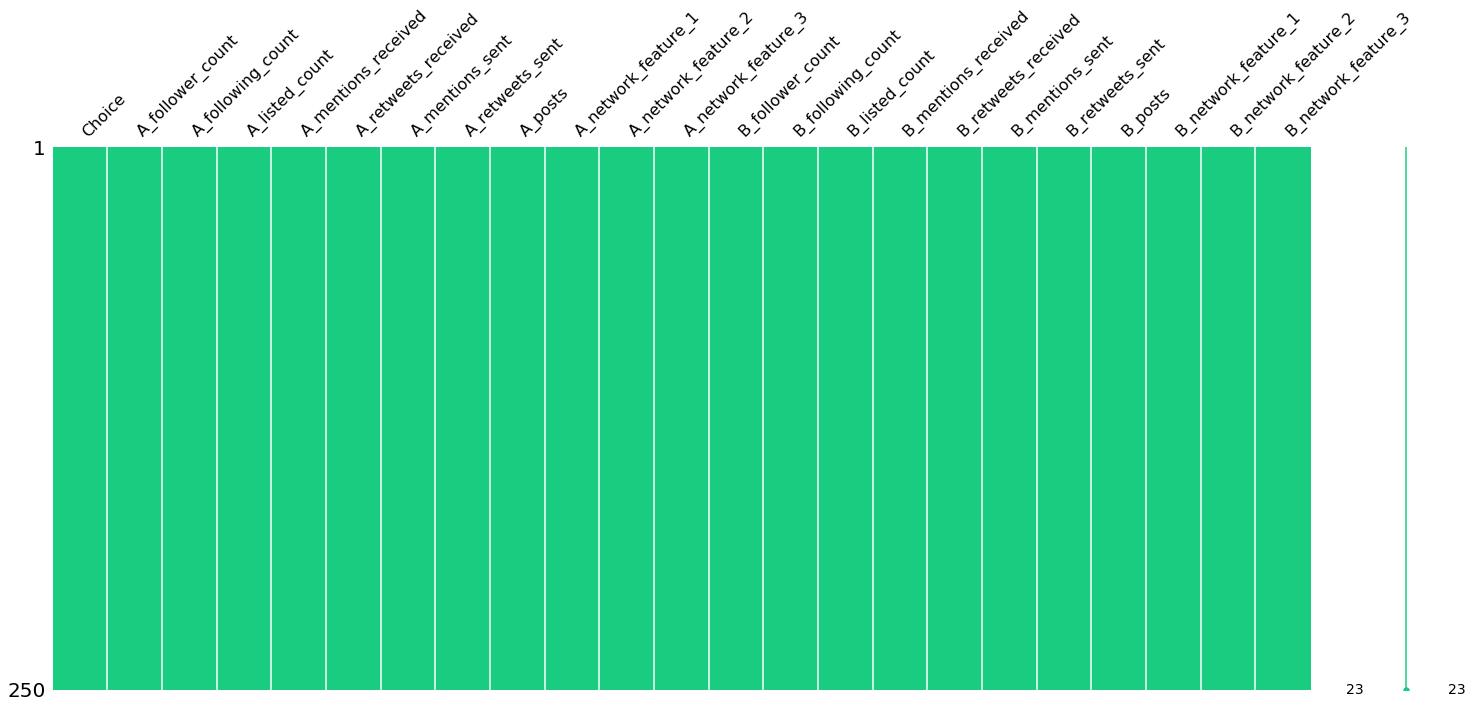

In [22]:
import missingno as msno
%matplotlib inline
print ("             ***************************************")
print ("                       Missing Value Map")
print ("             ***************************************")
msno.matrix(data.sample(250),color=(0.1, 0.8, 0.5))

Last results tell us we don't need a data imputation over the train data set. There are no missing values and all the variables has complete information. 

### Correlation between variables

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'CORRELATION BETWEEN VARIABLES')

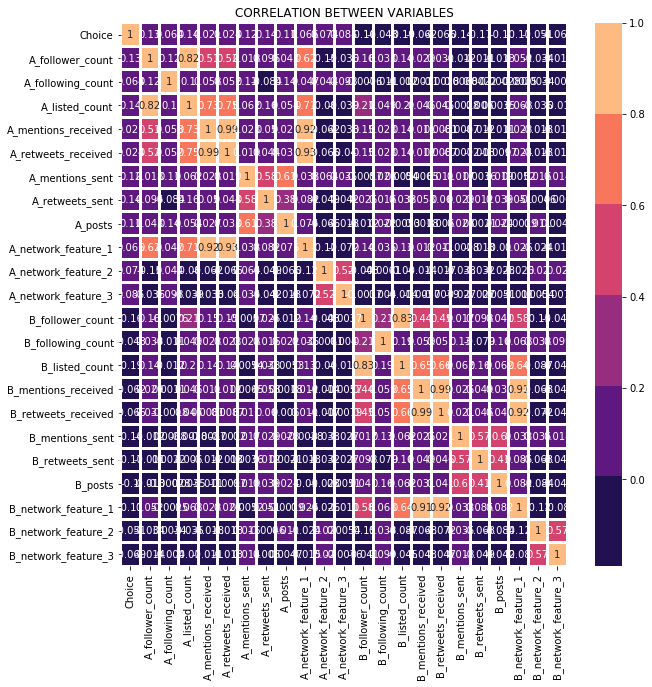

In [23]:
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 60)
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap=sns.color_palette("magma"),linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")


The correlation map show high correlation between the mentions and retweets of each individual (I.E 'A_mentions_recieved' with 'A_retweets recieved'). Nevertheless, those variables are retained in the dataset becuase the influence of an individual could be by their mentions or retweets.

### Balance data analysis

Text(0.5,1,'Proportion of target variable in dataset')

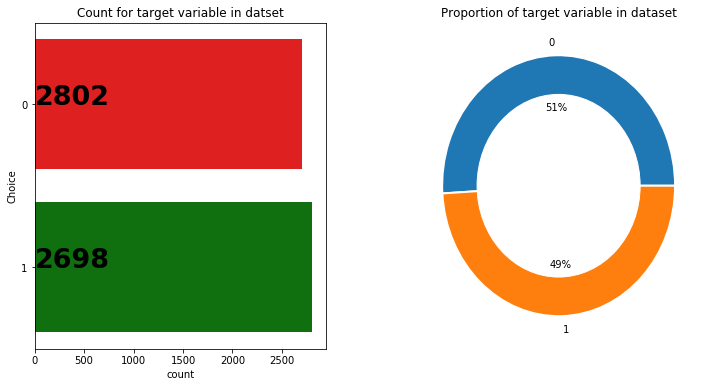

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = data["Choice"],palette=["r","g"])
for i,j in enumerate(data["Choice"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data["Choice"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset")

### Variable Comparison
Statistical comparison of mean and standard deviation values over training features.

_________________________________________________
 This plot shows the mean and standard deviation of attributes 
 for target classes to discover the varialbes which need to be normalized.
_________________________________________________
             [GREEN == 1 , RED == 0]
 1 -> Person A is more influencer than person B.
 0 -> Person B is more influencer than person A.
_________________________________________________


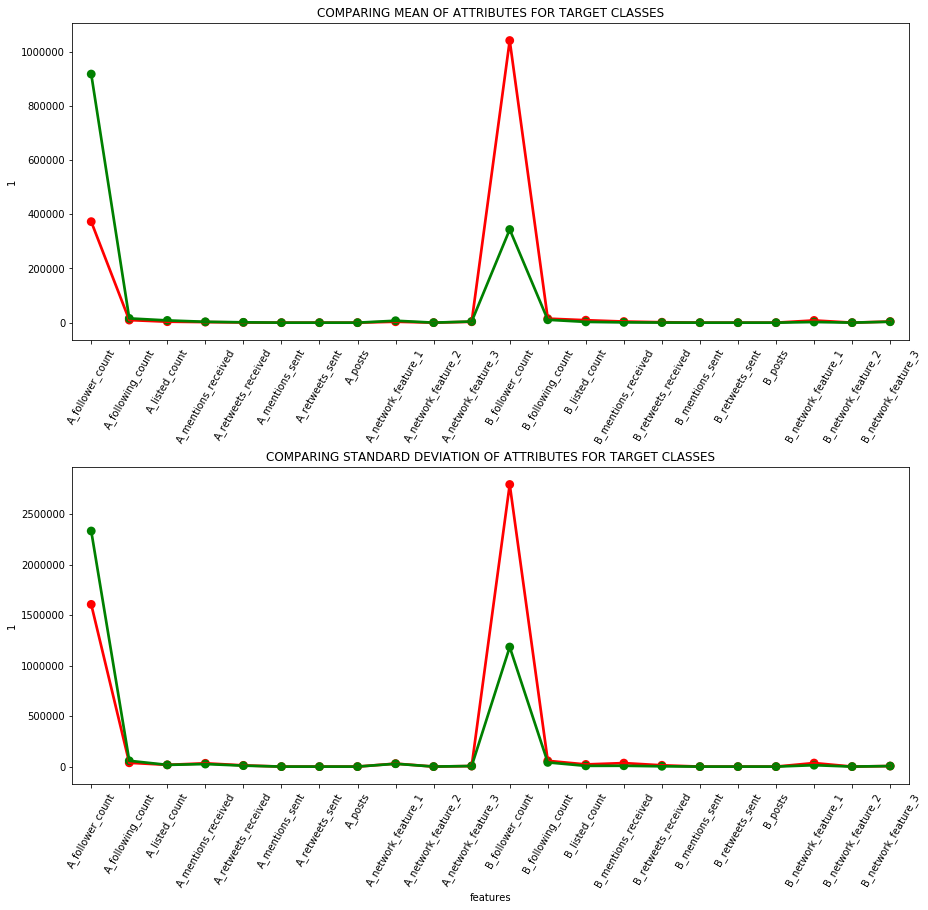

In [25]:
compare = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].mean().reset_index()


compare = compare.drop("Choice",axis =1)

compare1 = data.groupby("Choice")[['A_follower_count', 'A_following_count', 'A_listed_count', 'A_mentions_received',
                                        'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent',
                                        'A_posts','A_network_feature_1','A_network_feature_2','A_network_feature_3','B_follower_count','B_following_count','B_listed_count','B_mentions_received','B_retweets_received','B_mentions_sent','B_retweets_sent','B_posts','B_network_feature_1','B_network_feature_2','B_network_feature_3']].std().reset_index()
compare1 = compare1.drop("Choice",axis=1)

compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.figure(figsize=(15,14))
plt.subplot(211)
sns.pointplot(x= "features",y="0",data=compare_mean,color="r")
sns.pointplot(x= "features",y="1",data=compare_mean,color="g")
plt.xticks(rotation =60)
plt.xlabel("")
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"0", 1:"1"})
plt.subplot(212)
sns.pointplot(x= "features",y="0",data=compare_std,color="r")
sns.pointplot(x= "features",y="1",data=compare_std,color="g")
plt.xticks(rotation =60)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(hspace =.4)

print ("_________________________________________________")
print (" This plot shows the mean and standard deviation of attributes \n for target classes to discover the varialbes which need to be normalized.")

print ("_________________________________________________")
print ("             [GREEN == 1 , RED == 0]")
print (" 1 -> Person A is more influencer than person B.")
print (" 0 -> Person B is more influencer than person A.")
print ("_________________________________________________")

##### Distribution of variables in data set

                      ***************************************
                       DISTRIBUTION OF VARIABLES IN DATA SET
                      ***************************************


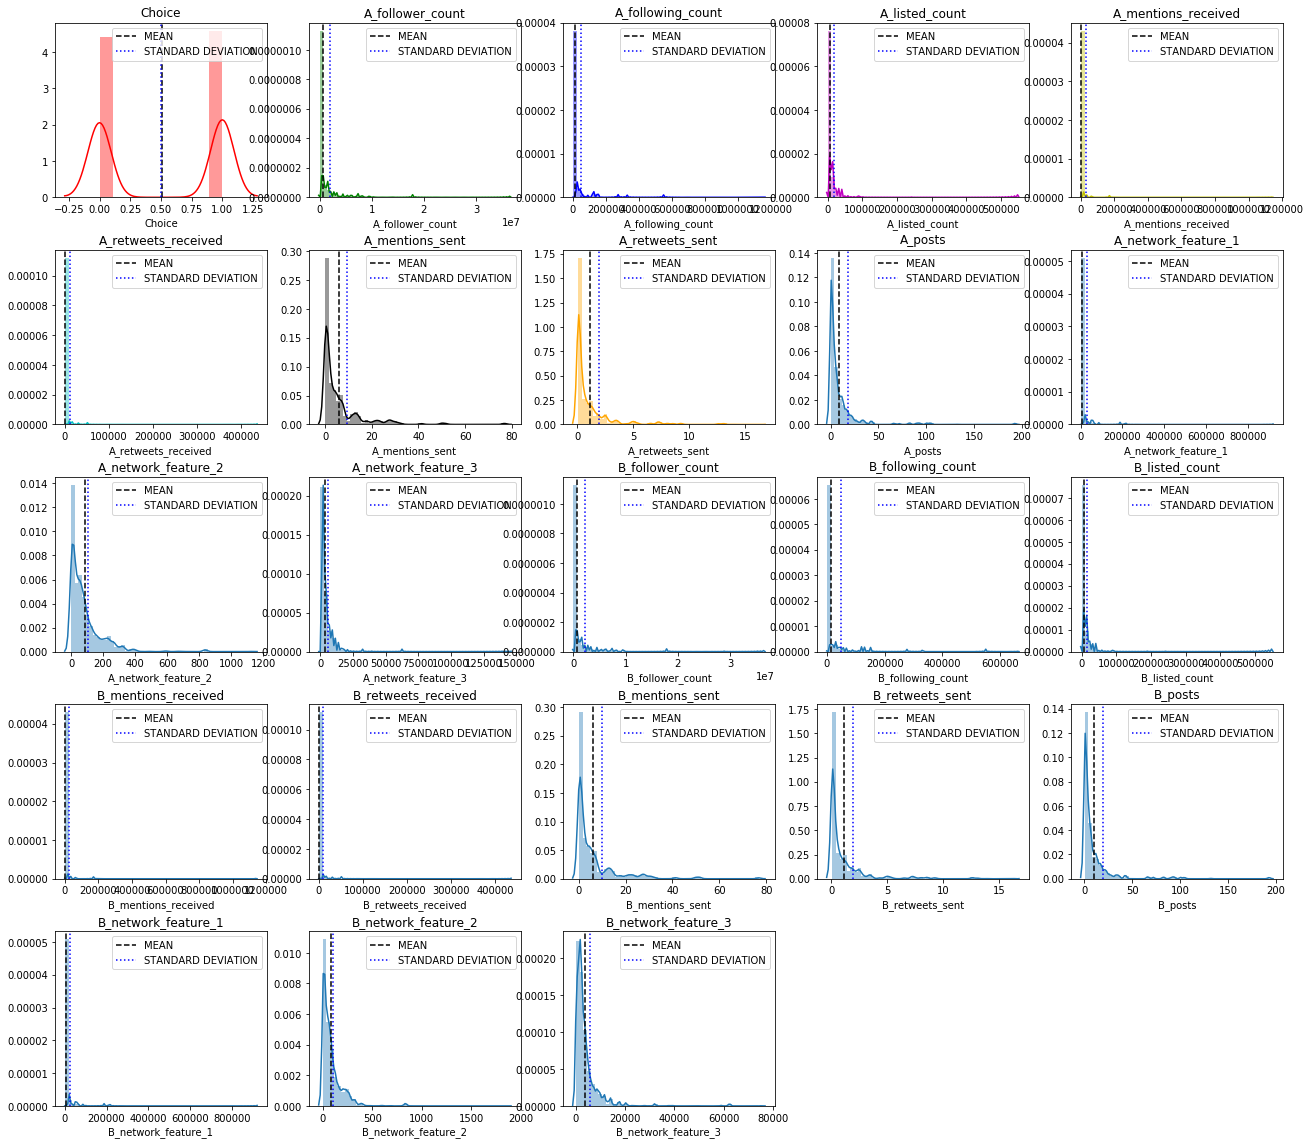

In [26]:
columns = ['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(22,45))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
     
print ("                      ***************************************")
print ("                       DISTRIBUTION OF VARIABLES IN DATA SET")
print ("                      ***************************************")

#### Scatter plot between variables for target classes

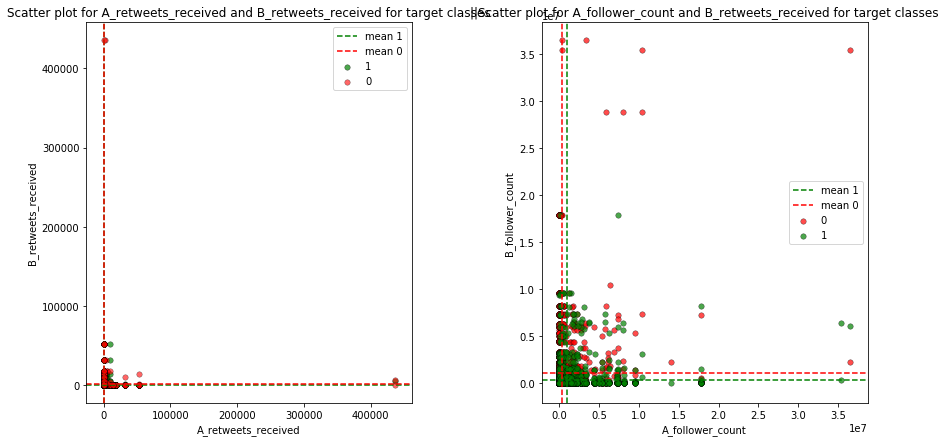

In [27]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(x = "A_retweets_received",y = "B_retweets_received",data=data[data["Choice"] == 1],alpha=.7,label="1",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "A_retweets_received",y = "B_retweets_received",data=data[data["Choice"] == 0],alpha=.6,label="0",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.axvline(data[data["Choice"] == 1]["A_retweets_received"].mean(),color = "g",linestyle="dashed",label="mean 1")
plt.axvline(data[data["Choice"] == 0]["A_retweets_received"].mean(),color = "r",linestyle="dashed",label ="mean 0")
plt.axhline(data[data["Choice"] == 1]["B_retweets_received"].mean(),color = "g",linestyle="dashed")
plt.axhline(data[data["Choice"] == 0]["B_retweets_received"].mean(),color = "r",linestyle= "dashed")
plt.legend(loc ="best")
plt.xlabel("A_retweets_received")
plt.ylabel("B_retweets_received")
plt.title("Scatter plot for A_retweets_received and B_retweets_received for target classes")
plt.subplot(122)
plt.scatter(x = "A_follower_count",y = 'B_follower_count',data=data[data["Choice"] == 0],alpha=.7,label="0",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.scatter(x = "A_follower_count",y = 'B_follower_count',data=data[data["Choice"] == 1],alpha=.7,label="1",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.axvline(data[data["Choice"] == 1]["A_follower_count"].mean(),color = "g",linestyle="dashed",label ="mean 1")
plt.axvline(data[data["Choice"] == 0]["A_follower_count"].mean(),color = "r",linestyle="dashed",label ="mean 0")
plt.axhline(data[data["Choice"] == 1]["B_follower_count"].mean(),color = "g",linestyle="dashed")
plt.axhline(data[data["Choice"] == 0]["B_follower_count"].mean(),color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("A_follower_count")
plt.ylabel('B_follower_count')
plt.title("||Scatter plot for A_follower_count and B_retweets_received for target classes")
plt.subplots_adjust(wspace =.4)


3D Analysis for Variables to target class

Text(0.5,0.92,'3D PLOT FOR CHOICE VS A_RETWEETS_RECEIVED VS A_FOLLOWER_COUNT')

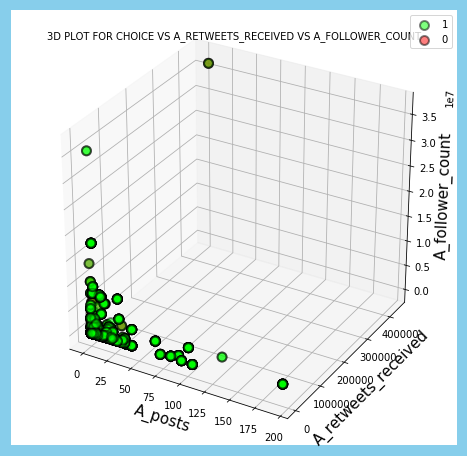

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["Choice"] == 1][["A_posts"]],data[data["Choice"] == 1][["A_retweets_received"]],data[data["Choice"] == 1][["A_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="1")
ax.scatter(data[data["Choice"] == 0][["A_posts"]],data[data["Choice"] == 0][["A_retweets_received"]],data[data["Choice"] == 0][["A_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label="0")

ax.set_xlabel("A_posts",fontsize=15)
ax.set_ylabel("A_retweets_received",fontsize=15)
ax.set_zlabel("A_follower_count",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("skyblue")
plt.title("3D PLOT FOR CHOICE VS A_RETWEETS_RECEIVED VS A_FOLLOWER_COUNT",fontsize=10)

Text(0.5,0.92,'3D PLOT FOR CHOICE VS B_RETWEETS_RECEIVED VS B_FOLLOWER_COUNT')

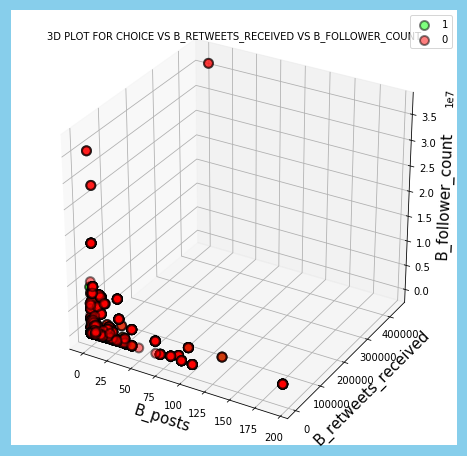

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["Choice"] == 1][["B_posts"]],data[data["Choice"] == 1][["B_retweets_received"]],data[data["Choice"] == 1][["B_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="1")
ax.scatter(data[data["Choice"] == 0][["B_posts"]],data[data["Choice"] == 0][["B_retweets_received"]],data[data["Choice"] == 0][["B_follower_count"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label="0")

ax.set_xlabel("B_posts",fontsize=15)
ax.set_ylabel("B_retweets_received",fontsize=15)
ax.set_zlabel("B_follower_count",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("skyblue")
plt.title("3D PLOT FOR CHOICE VS B_RETWEETS_RECEIVED VS B_FOLLOWER_COUNT",fontsize=10)

### Outlier Analysis 

Density plot between A_posts and A_retweets_received

  [1] 1845 1665 3272 5450  514 4838 1802  979 2301 4664 2760 5448 3261  734  737
 [16] 1008 4679 2309 3692 1643   97 2573 5197  687  721 1506   41  137 2772 1932
 [31]   95 1199 1112 5224 3355 3258  225 1091 2413 4896 4388 3178 5133 1125 4718
 [46] 1967 1478 3148 5204 4465 5006   22 1581 3311 4940 4921 4669 1832 1135 4805
 [61] 2392 2380 4935 3512 5477  208 1313  841 1284 4697 3557 4698 3394 2911 4398
 [76] 3810 4440 5227 4527 3185  108 3604 4215 2927 4003 1827 3452 4990 2900 5154
 [91] 1666 3560 2250 2368 1504  251  322 1448 1565  929


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     22    1306    2766    2754    4446    5477 

[1] "1845" "1665" "3272" "5450" "514"  "4838" "1802" "979"  "2301" "4664"
 [11] "2760" "5448" "3261" "734"  "737"  "1008" "4679" "2309" "3692" "1643"
 [21] "97"   "2573" "5197" "687"  "721"  "1506" "41"   "137"  "2772" "1932"
 [31] "95"   "1199" "1112" "5224" "3355" "3258" "225"  "1091" "2413" "4896"
 [41] "4388" "3178" "5133" "1125" "4718" "1967" "1478" "3148" "5204" "4465"
 [51] "5006" "22"   "1581" "3311" "4940" "4921" "4669" "1832" "1135" "4805"
 [61] "2392" "2380" "4935" "3512" "5477" "208"  "1313" "841"  "1284" "4697"
 [71] "3557" "4698" "3394" "2911" "4398" "3810" "4440" "5227" "4527" "3185"
 [81] "108"  "3604" "4215" "2927" "4003" "1827" "3452" "4990" "2900" "5154"
 [91] "1666" "3560" "2250" "2368" "1504" "251"  "322"  "1448" "1565" "929"

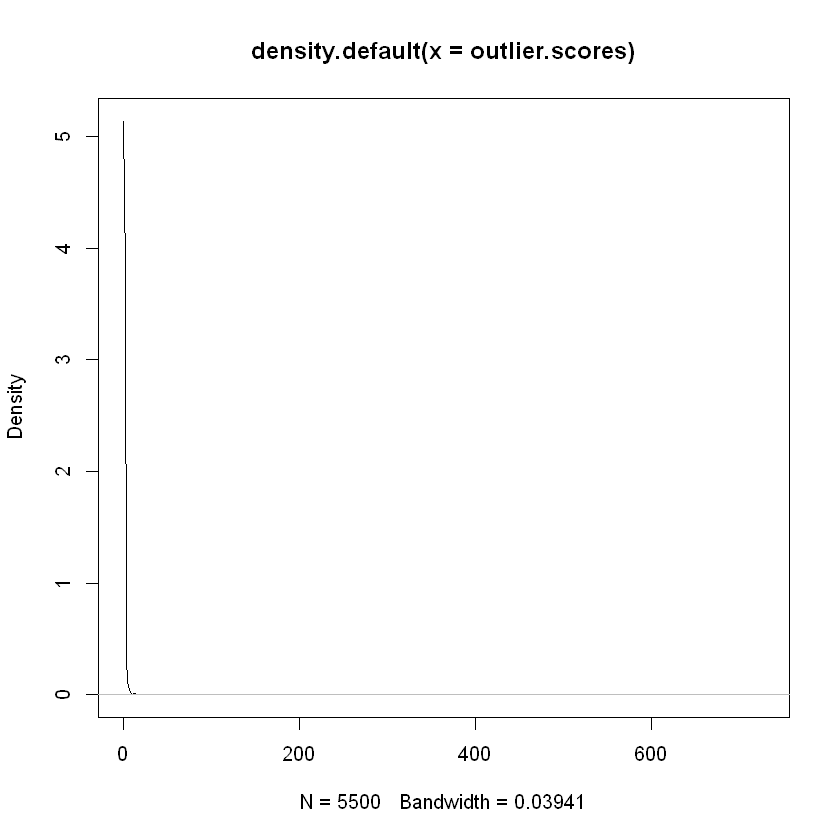

In [4]:
library(DMwR)
library(outliers)
library(car)
library(FactoMineR)

data= read.csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/train.csv")

outlier.scores <- lofactor(data[,-1], k=4)
plot(density(outlier.scores))
outliers <- order(outlier.scores, decreasing=T)[1:100]
print(outliers)
summary(outliers)
row.names(data[,-1])[outliers]

We can see in the last matrix and plot, the potential outliers, we identify 100 observation like atypical data.

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2

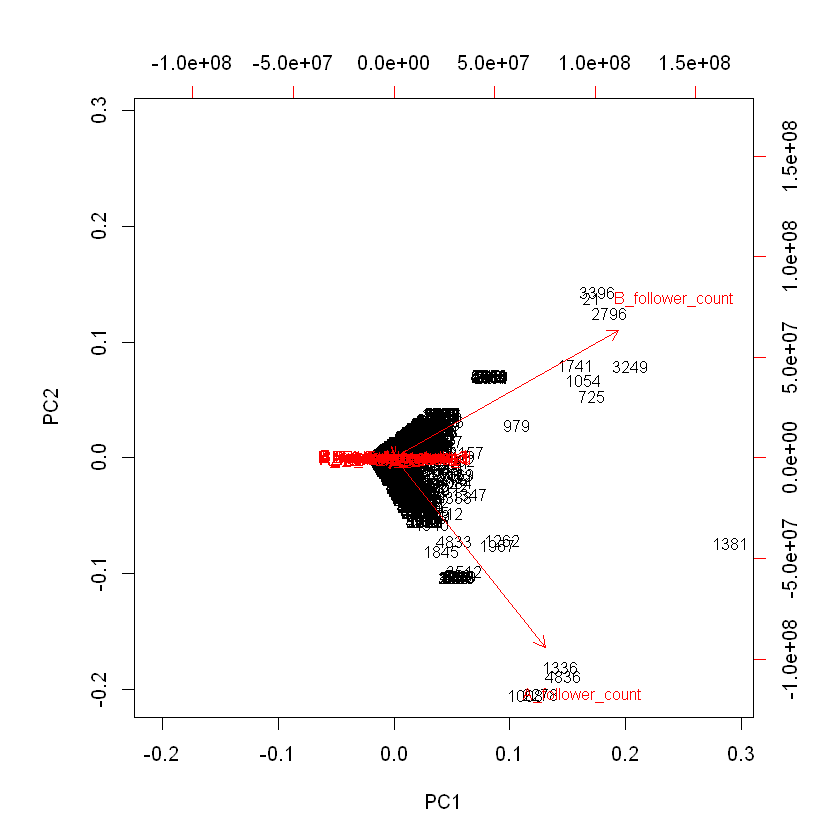

In [14]:
library(rmarkdown)
library(knitr)
library(rgl)
library(rglwidget)

n <- nrow(data[,-1])
labels <- 1:n
labels[-outliers] <- "."
biplot(prcomp(data[,-1]), cex=.8)

pch <- rep(".", n)
pch[outliers] <- "+"
col <- rep("black", n)
col[outliers] <- "red"

plot3d(data$Choice, data$A_follower_count, data$A_posts, type="s",size=0.6,col=col,pch=pch,lwd=0.5)

in the las plot we can see the two features with more outliers, `B_follower_count`,  `A_follower_count`.

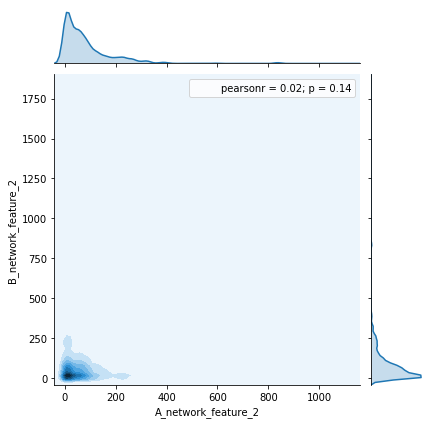

In [30]:
sns.jointplot(data["A_network_feature_2"],data["B_network_feature_2"],kind="kde")

Text(0.5,1,'Bubble plot for B_retweets_sent,B_network_feature_2 and B_following_count')

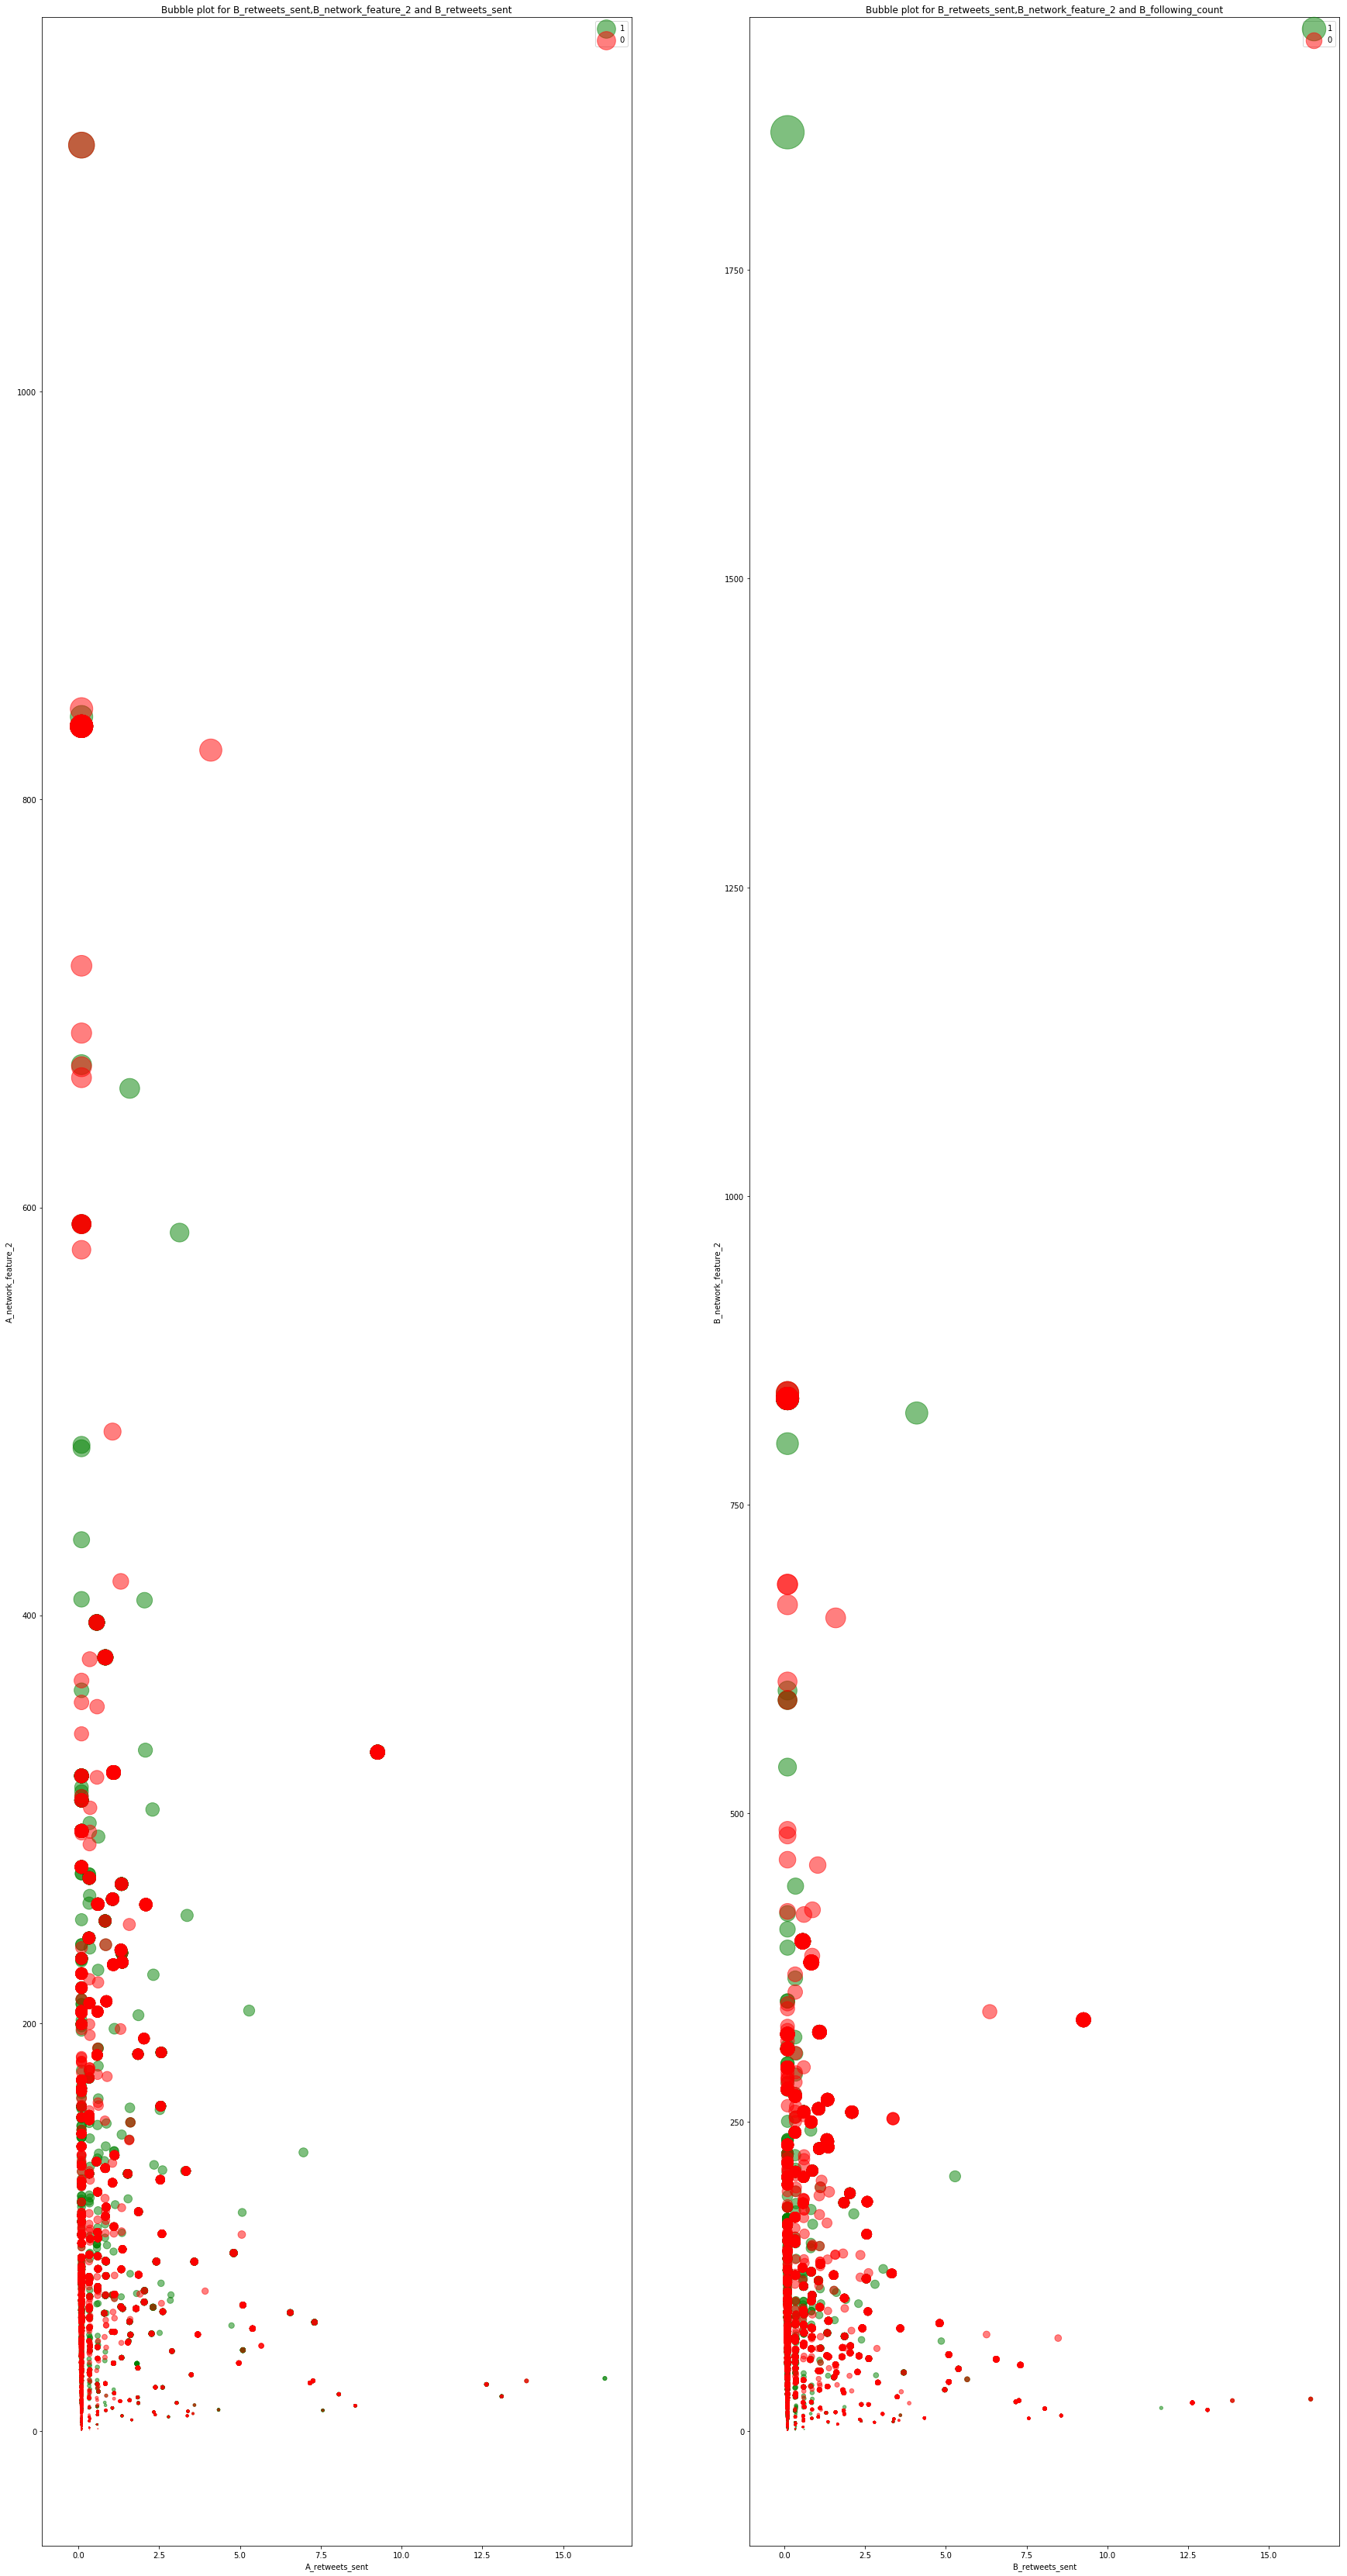

In [31]:
st = data[data["Choice"] == 1].reset_index()
nst= data[data["Choice"] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()
plt.subplot(121)
plt.scatter(st["A_retweets_sent"],st["A_network_feature_2"],alpha=.5,s=st["A_network_feature_2"],linewidths=1,color="g",label="1")
plt.scatter(nst["A_retweets_sent"],nst["A_network_feature_2"],alpha=.5,s=nst["A_network_feature_2"],linewidths=1,color="r",label="0")
plt.legend(loc="best")
plt.xlabel("A_retweets_sent")
plt.ylabel("A_network_feature_2")
plt.title("Bubble plot for B_retweets_sent,B_network_feature_2 and B_retweets_sent")


plt.subplot(122)
plt.scatter(st["B_retweets_sent"],st["B_network_feature_2"],alpha=.5,s=st["B_network_feature_2"],linewidths=1,color="g",label="1")
plt.scatter(nst["B_retweets_sent"],nst["B_network_feature_2"],alpha=.5,s=nst["B_network_feature_2"],linewidths=1,color="r",label="0")
plt.legend(loc="best")
plt.xlabel("B_retweets_sent")
plt.ylabel("B_network_feature_2")
plt.title("Bubble plot for B_retweets_sent,B_network_feature_2 and B_following_count")

### Visualizing the distribution of the variables for the target class

<Figure size 57600x2880 with 0 Axes>

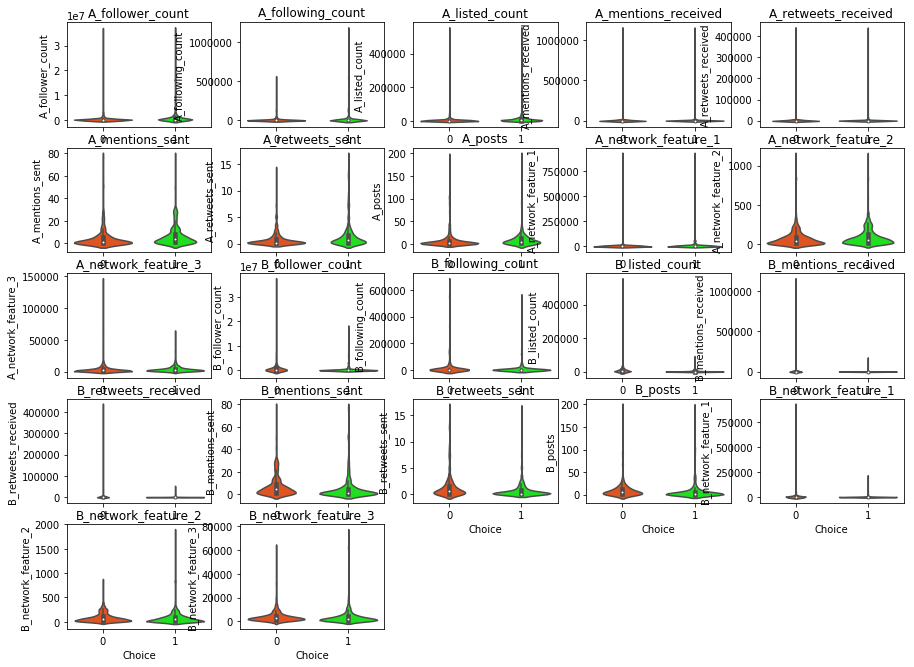

<Figure size 57600x2880 with 0 Axes>

In [32]:

columns = [x for x in data.columns if x not in ["Choice"]]
length  = len(columns)

plt.figure(figsize=(15,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["Choice"],y=data[i],palette=["Orangered","lime"],alpha=.5)
    plt.title(i)

plt.figure(figsize=(800,40))

<h1> <center> Pre-processing Data </h1> </center> 

The dataset has :  5500  entries.


Text(0,0.5,'')

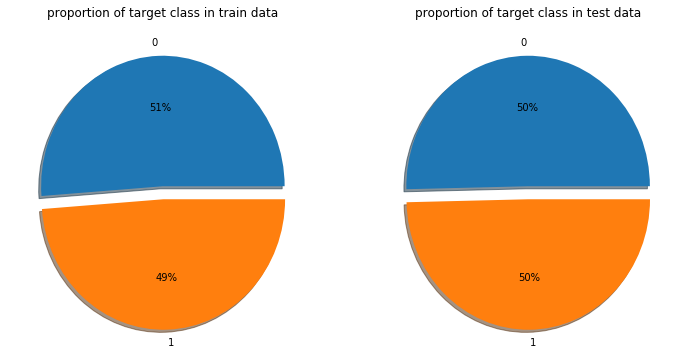

In [33]:
# Split the original data into train and test. 

from sklearn import model_selection 

dataSize = data.shape[0]
print("The dataset has : ",dataSize," entries.")

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)

plt.figure(figsize=(12,6))
plt.subplot(121)
yTrain.value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
yTest.value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in test data")
plt.ylabel("")


In [34]:
#   Perform a forward-backward feature selection based on p-value

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = xTrain
y = yTrain


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  B_listed_count                 with p-value 4.06978e-33
Add  A_listed_count                 with p-value 4.47078e-31
Add  A_mentions_received            with p-value 7.7054e-16
Add  B_retweets_sent                with p-value 1.639e-16
Add  A_mentions_sent                with p-value 3.69445e-14
Add  A_network_feature_1            with p-value 4.90116e-12
Add  A_network_feature_3            with p-value 1.38601e-12
Add  B_network_feature_3            with p-value 2.86458e-08
Add  B_retweets_received            with p-value 4.27184e-05
Add  B_network_feature_1            with p-value 1.39233e-10
Add  B_follower_count               with p-value 1.66872e-07
Add  A_follower_count               with p-value 0.000148333
Add  B_mentions_sent                with p-value 0.000134803
Add  A_retweets_sent                with p-value 0.00842339
resulting features:
['B_listed_count', 'A_listed_count', 'A_mentions_received', 'B_retweets_sent', 'A_mentions_sent', 'A_network_feature_1', 'A_networ

| The 5 most important variables are: |
|------|
| B_listed_count |
| A_listed_count |
| A_mentions_received |
| B_retweets_sent |
| A_mentions_sent |

As you can see the database is now perfect for statistical learning. The original database was ideal for work.

<h1> <center> Predictive Models </h1> </center> 

With the objetive of predict the Target Class (Choise) and understand and select the best model to predict the test dataset of the Influencers competition on Kaggle, we build and calibrate 10 models, of which in 2 models we used emsamble and stacking methods.

### Base Models Function 

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. based in the K-folds cross validation method with its confidence intervals.

In [35]:
# MODEL FUNCTION

# Import libraries.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score


# Function definition. 
def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)
    
    print ("*****************************************************************************************")
    print ("                           MODEL - OUTPUT")
    print ("*****************************************************************************************")
    
    # Training the algorithm.
    
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\n Accuracy Score :",accuracy_score(dtest_y,predictions))
    
    print ("\n Classification Report : \n \n",(classification_report(dtest_y,predictions)))
    
    ################# Results graph ######################## 
    
    # Confusion matrix. 
    
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("Confusion Matrix",fontsize=18,fontweight="bold")
    
    
    # ROC Curve. 
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),3)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - Curve & Area Under Curve",fontsize=18,fontweight="bold")
    
    # Coefficients importance graph (Optional)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("Feature Importance",fontsize=18,fontweight="bold")
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.002,i+0.45,round(j,3),weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("Feature Importance",fontsize=18,fontweight="bold")
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(max(dataframe["coefficients"])/20,i+0.45,round(j,3),weight = "bold")
            
    elif of_type == "none" :
        plt.subplot(224)
    
    ######## Cross Validation Analysis. ##################### 
    
    # Merge X_train and X_test.
    xTotal= np.concatenate((dtrain_x,dtest_x),axis=0)
    
    # Merge y_train and y_test. 
    yTotal= np.concatenate((dtrain_y,dtest_y),axis=0)
    
    k=10  # Scoring with Accuracy.
    scoresAccuracy=cross_val_score(rfc,xTotal,yTotal,cv=k)
    #print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAccuracy.mean(), scoresAccuracy.std() * 2))
    
    k=10  # Scoring with AUC.
    scoresAUC=cross_val_score(rfc,xTotal,yTotal,cv=k,scoring='roc_auc')
    #print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAUC.mean(), scoresAUC.std() * 2))
    
    plt.subplot(223)
    plt.title("Cross Validation Results",fontsize=18,fontweight="bold")
    lastPlot = plt.subplot(223)

    circle1 = plt.Circle((1, 2), 1, color='grey', alpha =0.7)
    circle2 = plt.Circle((4, 2), 1, color='#000033' , alpha=0.3)
    
    lastPlot.set_xlim((0,7))
    lastPlot.set_ylim((0,4))
    
    lastPlot.add_artist(circle1)
    lastPlot.add_artist(circle2)
    
    lastPlot.text(1,2.25,"AUC",weight = "bold",fontsize=16,ha='center')
    lastPlot.text(4,2.25,"Accuracy",weight = "bold",fontsize=16,ha='center')
    
    lastPlot.text(1,1.65,"%0.3f \n (+/- %0.3f)" % (scoresAUC.mean(), scoresAUC.std() * 2),fontsize=14 ,ha='center')
    lastPlot.text(4,1.65,"%0.3f \n (+/- %0.3f)" % (scoresAccuracy.mean(), scoresAccuracy.std() * 2),fontsize=14,ha='center')
    
    lastPlot.axis('off')
    
    lastPlot.plot()
    
    ################## Validation over real test set ####################### 
    
    # Importing validation(test) set.
    
    validation = pd.read_csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/test.csv",sep=",")
    
    
    predicting_probabilites = algorithm.predict_proba(validation)
    
    fileName=str(algorithm)[:7]+'_predictions.csv'
    printFile= open(fileName,'w+')
    
    #printFile.write('Id,Choice'+'\n')
    
    predPrint=pd.DataFrame(predicting_probabilites[:,0])
    
    predPrint.index=np.arange(1,len(predPrint)+1)
    
    predPrint.to_csv(fileName,index=True,header=['Choice'],index_label='id')
    
    printFile.close()
    
    
    

### Random Forest Classifier

The Random Forest algorithm is a emsamble method that allow combine and average individual desicion tree with overfitting,this method use the bagging technique with the main difference that select a set of random  sample variables for each partition of the tree it allowing uncorrelate the individual desicion tree and improve the predict capability.

![Image of Yaktocat](https://res.mdpi.com/def502001c756fb91acbf6c0c31f00c42e8b68f12062e07fa2a6c1d27c140cb8c73a97c6a8f56410878656ec8a301c8cb64def3cf3a91b8f2752d41113ff0e97002cf8a97aa977b66078b5193a7a3bdb0abb027113e49f9e66a6e4a0ca396fd488eda38d2e5559887d1fa7c8279f90acd20e7b0249c3c288289079a3f6682b4b9945bb7534afe91c7a4f9cec9fc3250f8d771ebd144fd2aa)

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve.  

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=16,
            oob_score=False, random_state=27, verbose=0, warm_start=False)

 Accuracy Score : 0.7733333333333333

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.79      0.74      0.76       819
          1       0.76      0.81      0.78       831

avg / total       0.77      0.77      0.77      1650



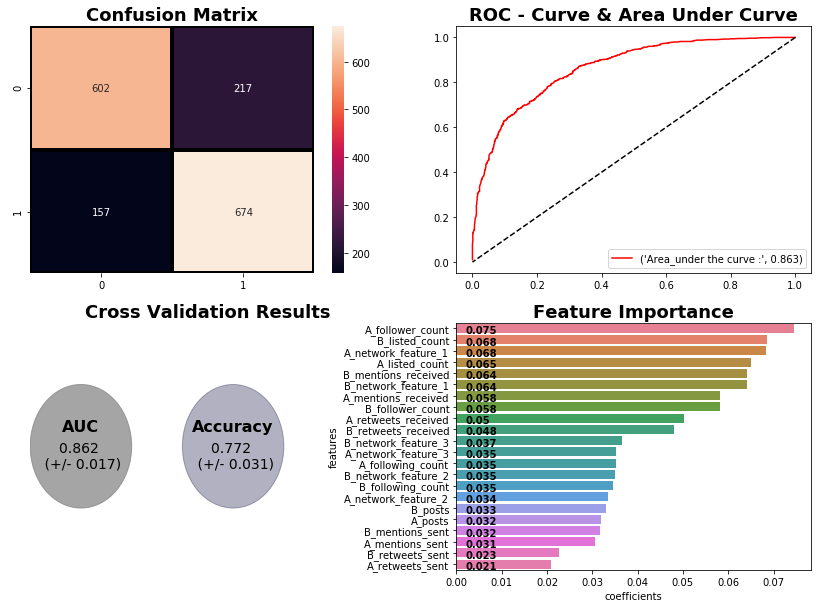

In [39]:
# Random Forest Classifier. 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=16,n_estimators=300, random_state=27, criterion='entropy')

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

the calibration process has been made with: $$m = \sqrt{p}$$ 
since it is a classification problem.

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.862` with a `confidende interval +/- 0.017` with cross validation method, on other hand the most important features are `A_network_feature_1`,`A_follower_count`, `B_listed_count`.

### Logistic Regression

the logistic regression model (or logit model) is a statistical model that is usually taken to apply to a binary dependent variable, in this case our binary taget is Chose, In clasification analysis, logistic regression or logit regression is estimating the parameters of a logistic model.

![Image of Yaktocat](http://blog.welcomege.com/wp-content/uploads/2017/07/2017-07-26_15-47-37.png)

More formally, a logistic model is one where the log-odds of the probability of an event is a linear combination of independent or predictor variables.

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=27,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Accuracy Score : 0.7357575757575757

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.74      0.73      0.73       819
          1       0.73      0.74      0.74       831

avg / total       0.74      0.74      0.74      1650



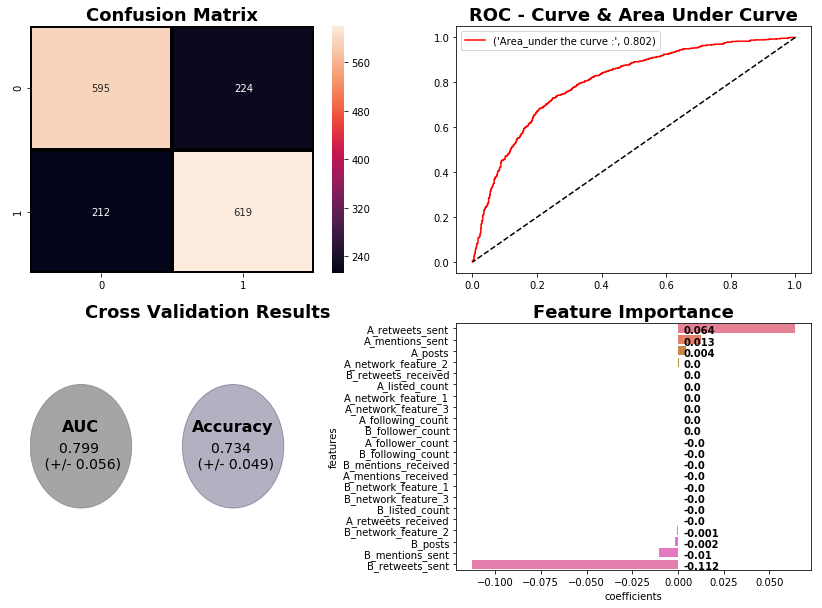

In [40]:
# Logistic Classifier. 
from sklearn.linear_model import LogisticRegression

rfc = LogisticRegression(penalty='l1',class_weight='balanced', random_state=27)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"coef")

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.799` with a `confidence interval +/- 0.056` with cross validation method, on other hand the most important features are `A_retweets_sent`, `A_mentions_sent`, `A_post`.

### k-nearest Neighbors

the k-nearest neighbors algorithm `(k-NN)` is a non-parametric method. The input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression, in this case for classification problem, An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/279px-KnnClassification.svg.png)

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

 Accuracy Score : 0.7387878787878788

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.75      0.71      0.73       819
          1       0.73      0.76      0.75       831

avg / total       0.74      0.74      0.74      1650



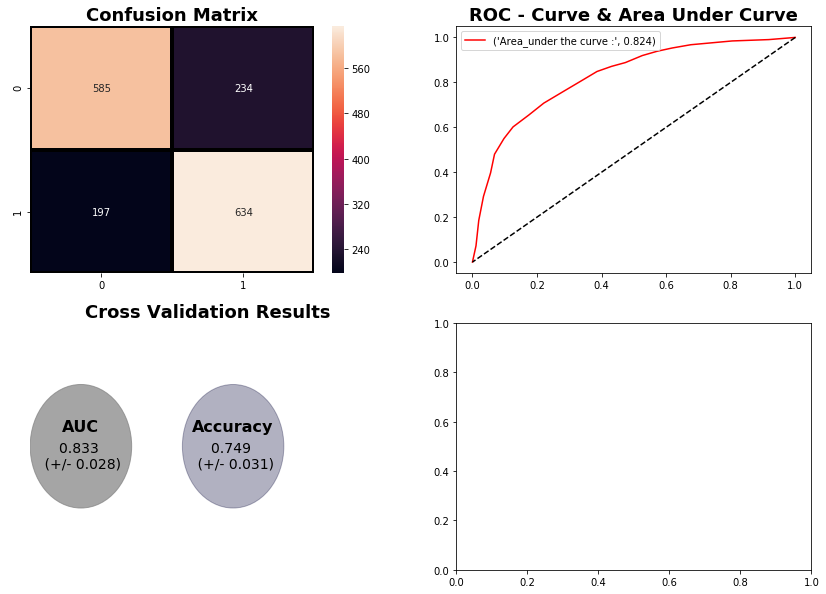

In [41]:
# K-nearest neighbors Classifier. 

from sklearn.neighbors import KNeighborsClassifier

# Parameter is the number of neighbors. 

rfc = KNeighborsClassifier(20)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"none")

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.833` with a `confidence interval +/- 0.028` with cross validation method. this model has best result than logistic regression.

### Decision Tree Classifier

Decision tree (as a predictive model) has the goal is to create a model that predicts the value of a target variable based on several input variables. to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

![Image of Yaktocat](https://cdn-images-1.medium.com/max/1600/1*xGsYc6aXehD7lyoLEn-mMA.png)

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=27,
            splitter='best')

 Accuracy Score : 0.7460606060606061

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.78      0.68      0.73       819
          1       0.72      0.81      0.76       831

avg / total       0.75      0.75      0.75      1650



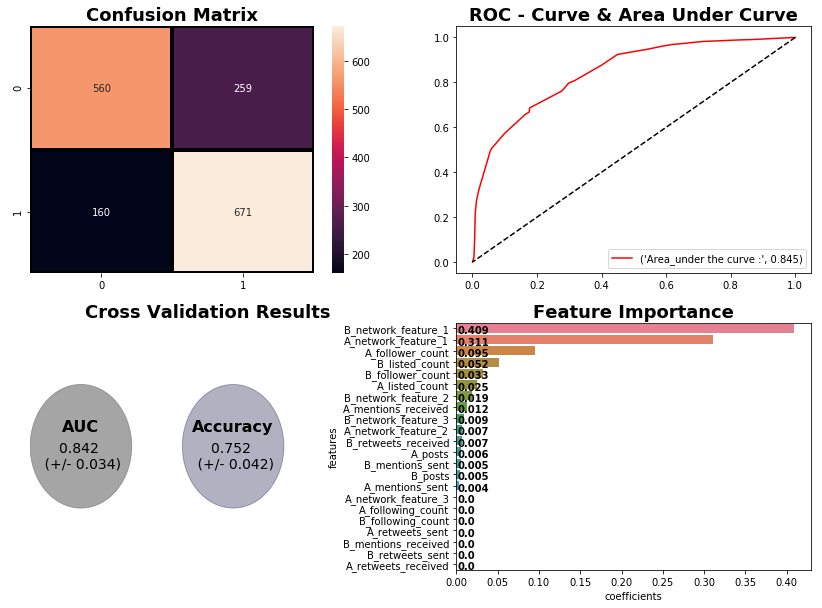

In [43]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

rfc = DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=27)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.843` with a `confidence interval +/- 0.034` with cross validation method. on other hand the most important features are `B_network_feature_!`, `A_network_feature_1`, `A_follower_count`. is very important mention that the desicion tree like individual predictive model theorically is bad predicter than for example random forest that emsamble many trees, this boostratp resampling method improve the variance of the estimators average it.

### AdaBoost classifier

Adaptive Boosting `AdaBoost` is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms.

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=27)

 Accuracy Score : 0.7739393939393939

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.78      0.76      0.77       819
          1       0.77      0.79      0.78       831

avg / total       0.77      0.77      0.77      1650



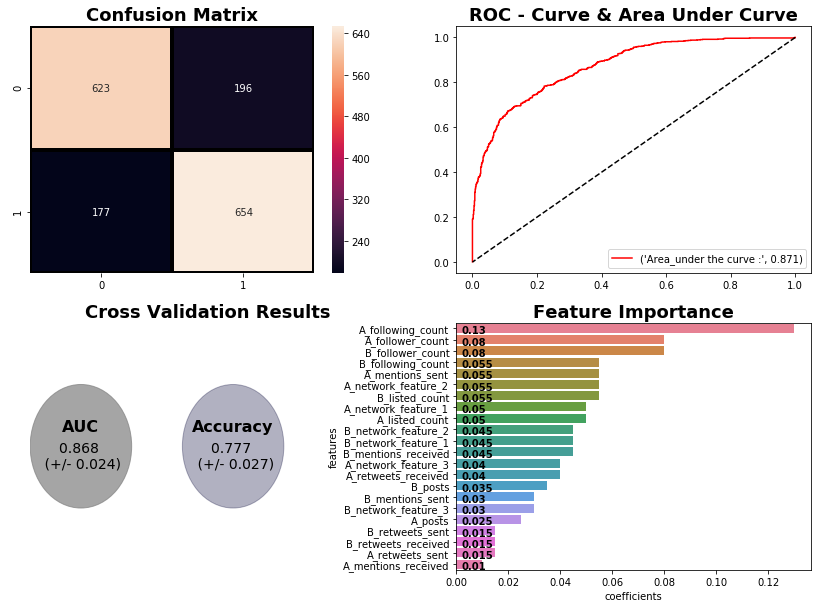

In [36]:
# AdaBoost classifier.

from sklearn.ensemble import AdaBoostClassifier

rfc = AdaBoostClassifier(n_estimators=200, learning_rate= 1.0,random_state=27)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.868` with a `confidence interval +/- 0.024` with cross validation method. on other hand the most important features are `B_following_count` `A_following_count`, `B_follower_count`.

### Naive Bayes Classificator
naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes theorem with strong independence assumptions between the features. this model are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem.

![Image of Yaktocat](https://www.safaribooksonline.com/library/view/mastering-machine-learning/9781788299879/assets/476d30fc-d03f-491d-8226-0d55c6019add.jpg)

Abstractly, naive Bayes is a conditional probability model: given a problem instance to be classified, represented by a vector: ![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/e981fc14b75616a87b281b37b73dd1b9f713ec68)representing some n features (independent variables), it assigns to this instance probabilities.

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
GaussianNB(priors=None)

 Accuracy Score : 0.5448484848484848

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.70      0.15      0.24       819
          1       0.53      0.94      0.67       831

avg / total       0.61      0.54      0.46      1650



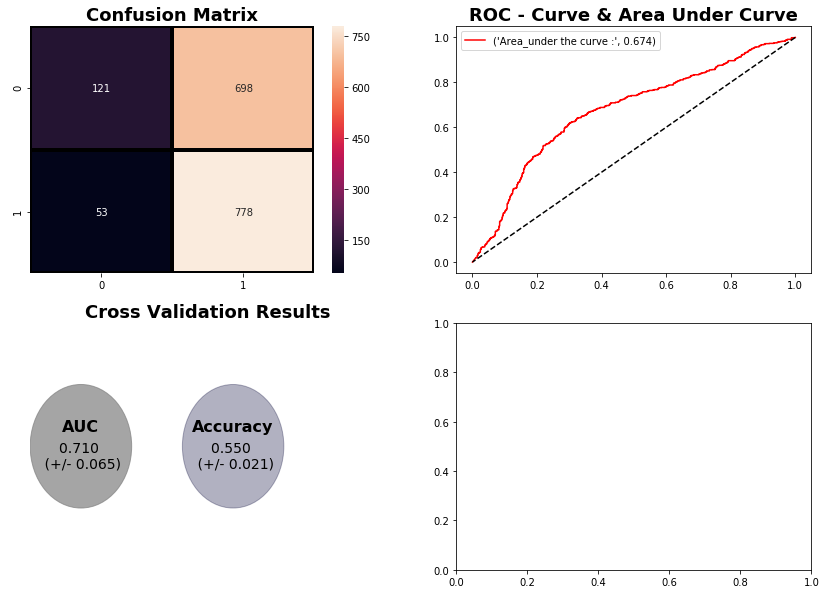

In [44]:
# Naive Bayes Classifier. 

from sklearn.naive_bayes import GaussianNB

# Parameter is the number of neighbors. 

rfc = GaussianNB()

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"none")

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.710` with a `confidence interval +/- 0.065` with cross validation method.

### Quadratic Discriminant Analysis

the QDA classifier results from assuming that the observations from each class are drawn from a Gaussian distribution, and
plugging estimates for the parameters into Bayes’ theorem in order to perform prediction.

For a quadratic classifier, the correct solution is assumed to be quadratic in the measurements, so y will be decided based on:

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/9c599da06caac9fac41f68b91e13f8e1afc655d9)

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

 Accuracy Score : 0.5806060606060606

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.73      0.24      0.37       819
          1       0.55      0.91      0.69       831

avg / total       0.64      0.58      0.53      1650



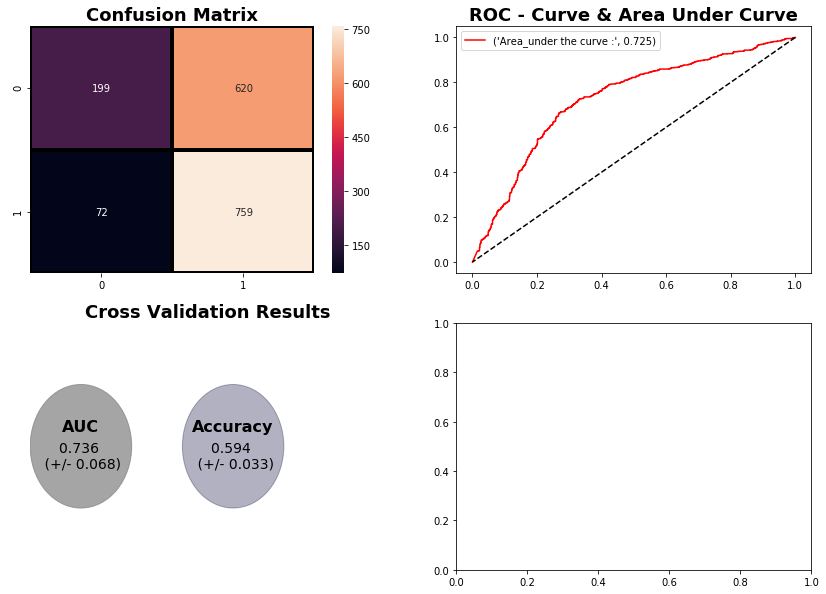

In [45]:
# Quadratic Discriminant Analysis Classifier.

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

rfc = QuadraticDiscriminantAnalysis()

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"none")

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.736` with a `confidence interval +/- 0.068` with cross validation method.

### Gradient Boosting Classifier.

Gradient Boosting Classifier produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an loss function. 

![Image of Yaktocat](http://api.ning.com/files/wrR3Z9xe9sJq990CffTVJP9ybHkxezcp8wahDWYxsRibma25ni*N4AUCGG7KEkglFLEwD8mdCW7XMxVNZTuh05ktVnRZBPmi/Combining_classifiers2.jpg)

First of all we build a model function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=27, subsample=1.0, verbose=0,
              warm_start=False)

 Accuracy Score : 0.7793939393939394

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.80      0.74      0.77       819
          1       0.76      0.81      0.79       831

avg / total       0.78      0.78      0.78      1650



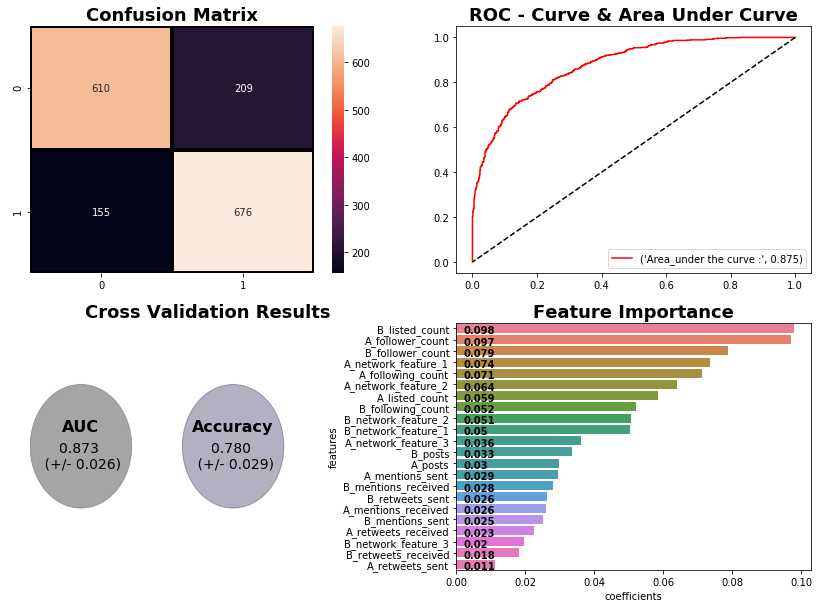

In [60]:
# Gradient Boosting Classifier.
from sklearn.ensemble import GradientBoostingClassifier

rfc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=1.0, 
                                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
                                 random_state=27, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False)

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"feat")

We can see in the last output cell a summary report about the main performance metrics, for this model the mean of the `AUC is 0.858` with a `confidence interval +/- 0.031` with cross validation method. on other hand the most important features are `B_network_feature_!`, `A_network_feature_1`, `B_listed_count`, `A_follower_count`, `B_follower_count`. this is a best model with greater AUC.

<h1> <center> Ensemble methods </h1> </center> 

The assembly methods had a lower performance than the classification algorithms evaluated separately.

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...rs=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

 Accuracy Score : 0.7181818181818181

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.86      0.52      0.65       819
          1       0.66      0.92      0.77       831

avg / total       0.76      0.72      0.71      1650



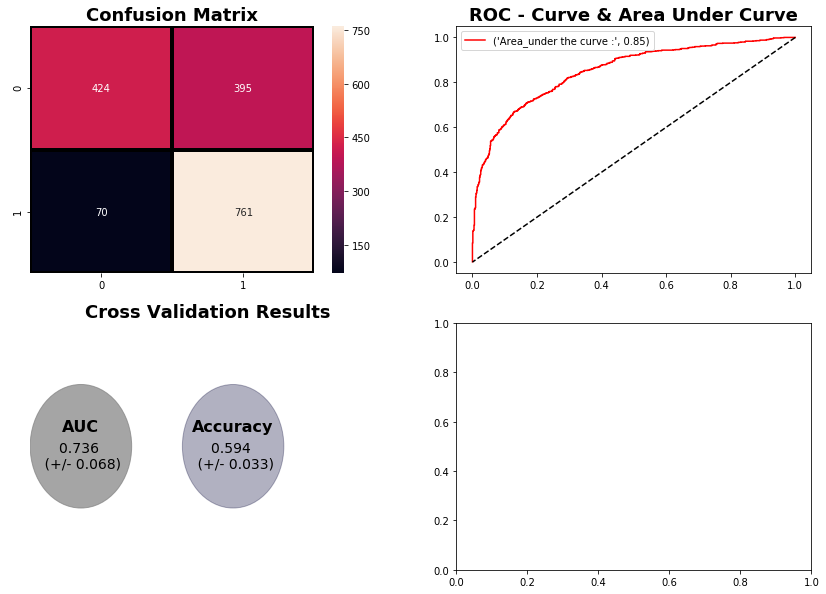

In [46]:
# Ensemble
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=27)
lr = LogisticRegression()
kn = KNeighborsClassifier(30)
dt = DecisionTreeClassifier(max_depth=5)
ab = AdaBoostClassifier()
gn = GaussianNB()
qd = QuadraticDiscriminantAnalysis()

eclf1 = VotingClassifier(estimators=[('rfc',rf),('lrf',lr),('knc',kn),('dtc',dt),('abc',ab),('gnb',gn),('qda',qd)],
                         voting ='soft')

model(eclf1,xTrain,yTrain,xTest,yTest,"none")

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
StackingClassifier(average_probas=False,
          classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_f...ors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)],
          meta_classifier=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

 Accuracy Score : 0.7654545454545455

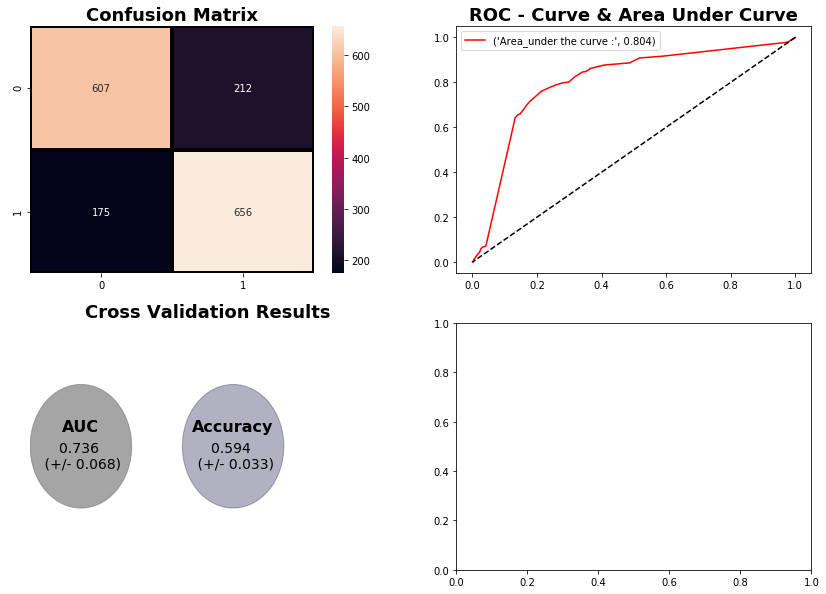

In [47]:
from mlxtend.classifier import StackingClassifier

sclf = StackingClassifier(classifiers=[rf,lr,kn,dt,gn,qd], meta_classifier=ab)

model(sclf,xTrain,yTrain,xTest,yTest,"none")

<h2><center>
Final Remarks
</center></h2>

<h2><center>
Kaggle Scores
</center></h2>

In [4]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/Scores.png")

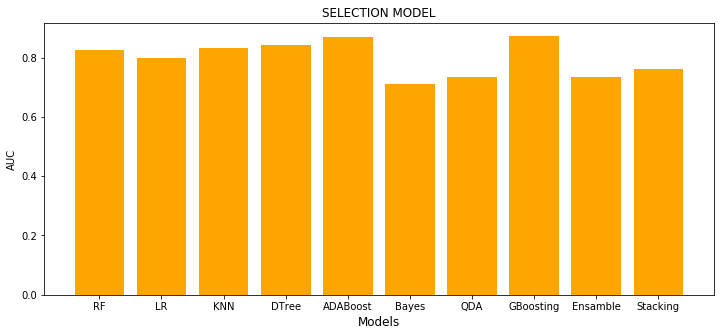

In [61]:
fig = figsize(12, 5)
plt.bar(["RF","LR","KNN","DTree","ADABoost","Bayes","QDA","GBoosting","Ensamble","Stacking"],[0.8262,0.7999,0.833,0.842,0.868,0.71,0.736,0.873,0.736,0.763],color="orange",align='center')
plt.title("SELECTION MODEL")
plt.xlabel("Models",fontsize=12)
plt.ylabel("AUC")
plt.show()

The models whose results in the tests had the highest AUC were loaded: Random Forest, AdaBoost classifier and Gradient Boosting Classifier.
Among them the Gradient Boosting Classifier had the best performance with a `result of: 0.86815`. With this score the position in which we are inside the `competition is 25`.